In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,matthews_corrcoef,ConfusionMatrixDisplay,roc_curve,roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=load_breast_cancer()
x=data.data
y=data.target

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [4]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:,1]

In [6]:
acc=accuracy_score(y_pred=y_pred,y_true=y_test)
pre=precision_score(y_pred=y_pred,y_true=y_test)
re=recall_score(y_pred=y_pred,y_true=y_test)
f1=f1_score(y_pred=y_pred,y_true=y_test)
auc=roc_auc_score(y_test,y_pred_proba)
cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
mcc=matthews_corrcoef(y_pred=y_pred,y_true=y_test)

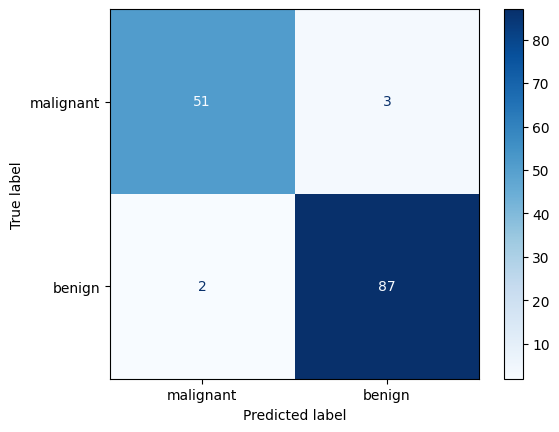

In [7]:
conf=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=data.target_names)
conf.plot(cmap=plt.cm.Blues)

In [8]:
tp,fp,fn,tn=cm.ravel()

In [9]:
f_acc= (tp+tn)/(tp+tn+fp+fn)
print(f" Accuracy : {f_acc:.3f} , sklearn accuracy : {acc:.3f}")

 Accuracy : 0.965 , sklearn accuracy : 0.965


In [10]:
f_pre= tp/(tp+fp)
print(f" precision : {f_pre:.3f}, sklearn precision : {pre:.3f}")

 precision : 0.944, sklearn precision : 0.967


In [11]:
f_re= tp/(tp+fn)
print(f" Recall : {f_re:.3f}, sklearn recall : {re:.3f}")

 Recall : 0.962, sklearn recall : 0.978


In [12]:
f_npv= tn/(tn+fn)
print(f" NPV : {f_npv:.3f}")

 NPV : 0.978


In [13]:
f_specificity= tn/(tn+fp)
print(f" Specificity : {f_specificity:.3f}")

 Specificity : 0.967


In [14]:
f_f1= (2 * f_pre * f_re)/(f_pre + f_re)
print(f" F1 Score : {f_f1:.3f}, sklearn F1 Score : {f1:.3f}")


 F1 Score : 0.953, sklearn F1 Score : 0.972
